# 데이터 준비하기

## MNIST 숫자 손글씨 Dataset 불러오기

* 딥러닝 구현 실습은 Tensorflow 버전 2.6.0에서 진행
* TF 2.6.0이 설치된 환경에서 먼저 다음의 코드를 실행하기
* MNIST 데이터셋은 Yann Lecun 교수님이 공개한 데이터 자세한 정보는 아래의 url 확인    
    
- https://www.tensorflow.org/datasets/catalog/mnist?hl=ko
- chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://d3s0tskafalll9.cloudfront.net/media/documents/textlink.pdf

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__) # Tensorflow의 버전 확인하기

mnist = keras.datasets.mnist

# MNIST 데이터를 로드하기 , 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2.19.0


In [2]:
# X_train 배열의 크기를 출력하기
print(len(x_train)) 

60000


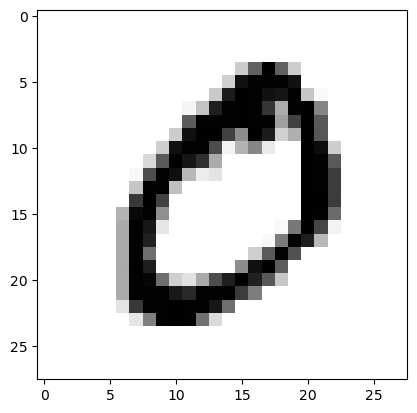

In [3]:
# 손글씨 이미지 출력해보기
plt.imshow(x_train[1], cmap = plt.cm.binary) 
# cmap에서 binary - 흑백, gray - 회색조, viridis - 기본값(예쁜색상), hot- 검정 → 빨강 → 노랑 등이 있다.
plt.show()

In [4]:
# y_train 인덱스[1]에 어떤값이 들어있는지 확인하기
print(y_train[1])

0


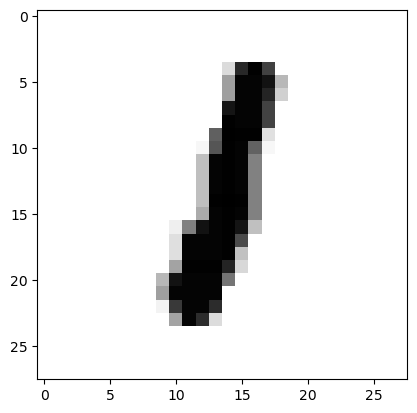

4508 번째 이미지의 숫자는 바로 1 입니다.


In [5]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index = 4507
plt.imshow(x_train[index], cmap = plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

### 학습용 데이터와 시험용 데이터
**코드 살펴보기**
> (x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어 받았는데    
우리가 만든 숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train) 만을 가지고 학습시키는것    
이 손글씨 분류기의 성능을 보려면 시험용(x_test, y_test)로 테스트 할 수 있다.    

* MNIST 데이터셋
    * 약 500명 사용자가 작성한 숫자 이미지를 가지고있다.
    * 250여명의 데이터가 학습용 데이터 , 나머지 250명이 시험용 데이터로 이용됨

In [6]:
# 학습용 데이터 몇장인지 확인하기
print(x_train.shape)
print('(갯수, 가로크기, 세로크키)')

(60000, 28, 28)
(갯수, 가로크기, 세로크키)


In [7]:
# 시험용 데이터 몇장인지 확인하기
print(x_test.shape)

(10000, 28, 28)


## 데이터 전처리 하기

In [8]:
# 손글씨 이미지는 실제 픽셀 값은 0~255 사이의 값을 가진다.
# 위 내용을 확인해보기
print('최소값:', np.min(x_train), '최대값:', np.max(x_train))

최소값: 0 최대값: 255


인공지능 모델을 훈련시키고 사용할 때 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는것이 좋다.
* 아래에서 MNIST 데이터는 각 픽셀의 값이 0~255사이에 있으므로 데이터를 255.0으로 나누어 준다.
* 나눈 후 최소값이 0 최대값이 1에 근접하도록 나오는지 확인해보기

In [9]:
# 255로 나누고 최소값 최대값 확인해보기
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


# 딥러닝 네트워크 설계하기

## Sequential Model을 사용해 보자

* 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법 사용하기
* 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있다.
* 케라스에서 모델을 만드는 방법은 Sequential API 외에도 Functional API를 이용하는 방법, 밑바닥부터 직접 코딩하는 방법 등여러가지가 있다.
* 아래의 코드에서 tf.keras의 Swquential API를 이용해 LeNet이라는 딥러닝 네트워트 설계한 예시이다.

In [10]:
# 8줄밖에 안되는 간단한 코드지만 손글씨 숫자 분류기를 구현하는데는 충분하다.
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ' , len(model.layers))

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model에 추가된 Layer 개수:  7


* 위 코드의 의미
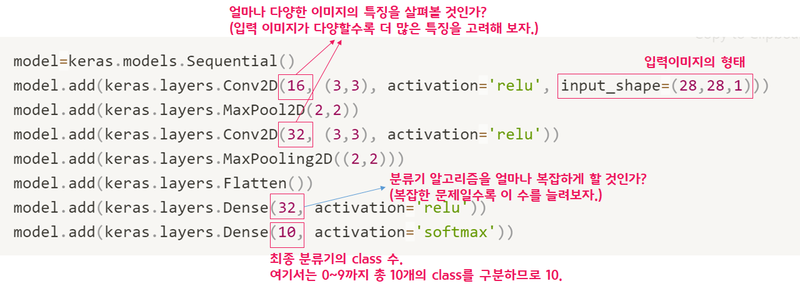

**input_shape=(28, 28, 1) 코드의미 : 28 X 28 사이즈인 흑백이미지**     
만일 사용할 input 데이터가 컬러 이미지라면 3개의 색상 채널을 의미하는 3으로 표현해야한다.    
*(컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3)*

**Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수**
* 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻
* 우리 숫자 이미지는 단순한 형태로 강아지 얼굴 이미지라면 디테일하고 복잡한 영상이라 특징 숫자를 늘려주는 것을 고려해 볼 수 있다.

**Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자**
* 이값이 클수록 복잡한 분류기를 만들 수 있다.
* 만약 알파벳이라면 대분자 26개, 소문자 26개, 총 52개의 클래스를 분류해야함
* 알파벳이라면 32보다 큰 64, 128등을 고려해볼 수 있다.    
    
**Dense 레이어의 뉴런 숫자는 결과적으로 분류해야하는 클래스 수**
* 숫자 인식기는 10(위에서 0~9의숫자를사용), 알파벳 인식기에서는 52가 된다.

In [11]:
# 위에서 만든 딥러닝 네트워크 모델 확인해보기
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

## 딥러닝 네트워크 학습시키기
* 위에서 만든 네트워크입력은 `(데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)` 와 같은 형태
* 레이어에 `input_shape = (28,28,1)` 지정을 했지만 `(60000, 28, 28)` 채널수에 대한 정보가 없음
* `(60000, 28, 28, 1)`로 만들어 주기

In [12]:
# (60000, 28, 28, 1)로 만들어 주기
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


* 여기서 epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습하라는 뜻
* model의 입력 정의에 형태를 맞춘 `x_train_reshaped`가 사용되어야 한다.

In [13]:
#  x_train 학습 데이터로 딥러닝 네트워크를 학습하기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8828 - loss: 0.4059
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9797 - loss: 0.0642
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0433
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9899 - loss: 0.0317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9920 - loss: 0.0266
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0221
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9950 - loss: 0.0168
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9957 - loss: 0.0124
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0088


* 각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있다.
* 인식 정확도가 0.9413에서 0.9957까지 매우 높게올라가는걸 확인할 수 있다.
* 9 epoch정도부터는 인식률의 상승이 미미하다.
* 10 epoch정도 학습을 시키면 충분하다고 판단할 수 있다. (학습마다 인식 정확도는 변동됨)

In [14]:
# font_path = "C:/Users/nini/AppData/Local/Microsoft/Windows/Fonts/감탄로드바탕체 Regular.ttf"
# font_prop = fm.FontProperties(fname=font_path)
# print(font_prop.get_name())

# 잘 만들었는지 확인하기

## 테스트 데이터로 성능 확인하기
* 위는 연습문제를 잘푸는 인공지능을 만든것과 같다.
* 시험용 데이터를 가지고 확인해보자.

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - 2ms/step - accuracy: 0.9879 - loss: 0.0425
test_loss: 0.04247304052114487
test_accuracy: 0.9879000186920166


* 결과는 98.79로 확인됨.
* 참고문헌을 보면 MNIST 데이터셋은 학습용과 시험용의 손글씨 주인이 다르다.
* 즉, 한번도 본적 없는 필체의 손글씨가 섞여있다. (인식률이 떨어지는 이유)

## 어떤 데이터를 잘못 추론했을까?
model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다.    
위에 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수    
이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 된다.

In [16]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
model.predict() 결과 :  [1.3750638e-11 5.5649602e-10 8.7824510e-08 4.1723314e-07 4.3366050e-08
 5.2972369e-09 2.9632243e-12 9.9999940e-01 4.3458179e-09 3.6415886e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


* 위 모델은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻
* 정말 숫자 7인지 확인하기

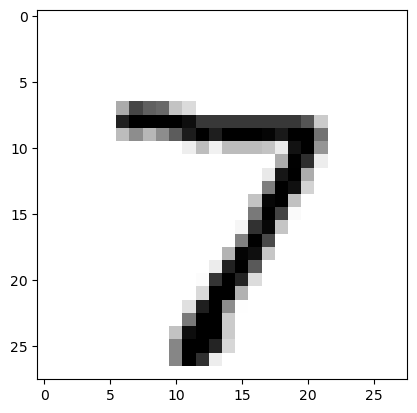

In [17]:
# 숫자확인해보기 시각화
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.08656734e-01 1.56074309e-09 8.91292393e-01 8.83904894e-11
 3.18711613e-10 5.95677285e-09 4.41263737e-09 3.52487223e-05
 1.48633171e-05 7.91745720e-07]
라벨: 0, 예측결과: 2


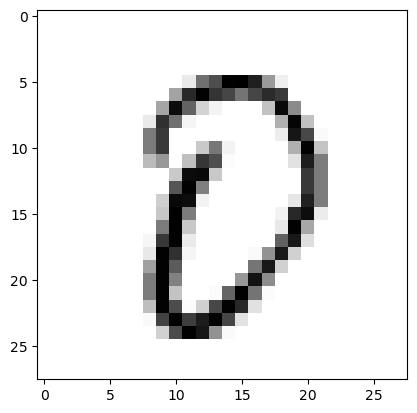

예측확률분포: [2.0299369e-08 2.6023415e-09 5.9697655e-08 2.0326192e-07 4.1666279e-09
 6.2030512e-01 2.9087648e-01 3.5533967e-10 8.8762194e-02 5.5979061e-05]
라벨: 6, 예측결과: 5


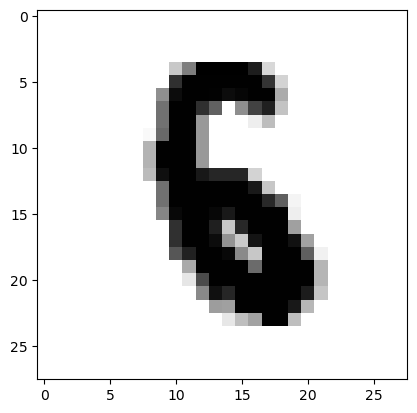

예측확률분포: [3.9055983e-10 3.9885895e-06 8.6756378e-01 2.1448996e-02 1.9446541e-05
 6.2178285e-10 4.3047413e-16 1.0009987e-01 1.1980030e-04 1.0744131e-02]
라벨: 7, 예측결과: 2


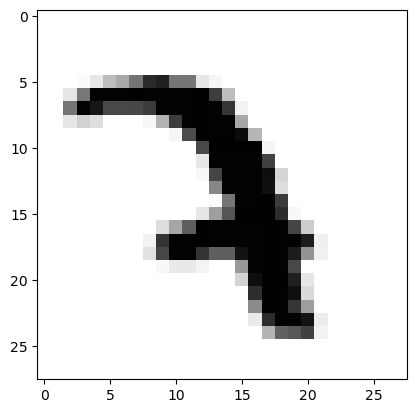

예측확률분포: [5.0779818e-11 6.4195597e-06 1.6566181e-01 6.7552578e-01 1.6091343e-07
 2.1134130e-07 3.2332944e-15 1.5614565e-01 2.6595751e-03 4.4313887e-07]
라벨: 2, 예측결과: 3


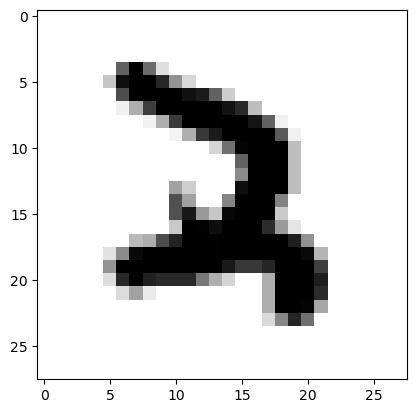

예측확률분포: [2.0299369e-08 2.6023415e-09 5.9697655e-08 2.0326192e-07 4.1666279e-09
 6.2030512e-01 2.9087648e-01 3.5533967e-10 8.8762194e-02 5.5979061e-05]
라벨: 6, 예측결과: 5


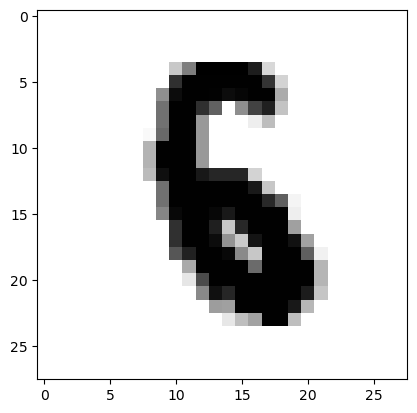

In [18]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

**틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있다**    
model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나이다.

# 더 좋은 네트워크 만들어 보기

* 성능을 더 올릴 수 있는 방법은?
* 구조 자체는 바꾸지 않으면서도 우리가 해볼 수 있는 것들이 있다.
* 3번째 스텝 딥러닝 네트워크 설계하기에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것
* Conv2D 레이어에서 입력 이미지의 특징 수조정,
* Dense 레이어에서 뉴런수 바꾸기,
* 학습 반복 횟수인 epoch 값을 변경

In [20]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=20
n_channel_2=45
n_dense=40
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 45)     │         8,145 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 45)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1125)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │        45,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,795 (210.14 KB)

 Trainable params: 53,795 (210.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8829 - loss: 0.3801
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9840 - loss: 0.0528
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9888 - loss: 0.0356
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9922 - loss: 0.0247
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9937 - loss: 0.0197
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9953 - loss: 0.0158
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9956 - loss: 0.0141
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9966 - loss: 0.0104
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9963 - loss: 0.0098
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9972 - loss: 0.0081
313/313 - 1s - 3ms/step - accuracy: 0.9910 - loss: 0.0331
test_loss: 0.03314834460616112 
test_accuracy: 0.99